In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)

#info
df.info()
# Info for numerical features
df.describe()

# Info for categorical features
df.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [2]:
############Data Cleaning###########

duplicated_rows = df.duplicated()
any_duplicates = duplicated_rows.any()

print("Duplicated Rows:")
df[duplicated_rows]

#drop duplicate rows

df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


# convert income to target values using map

income_map = {'<=50K': 1, '>50K': 0}
df['income'] = df['income'].map(income_map)

# convert object data type of income column to int
df['income'] = df['income'].astype('int')


Duplicated Rows:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


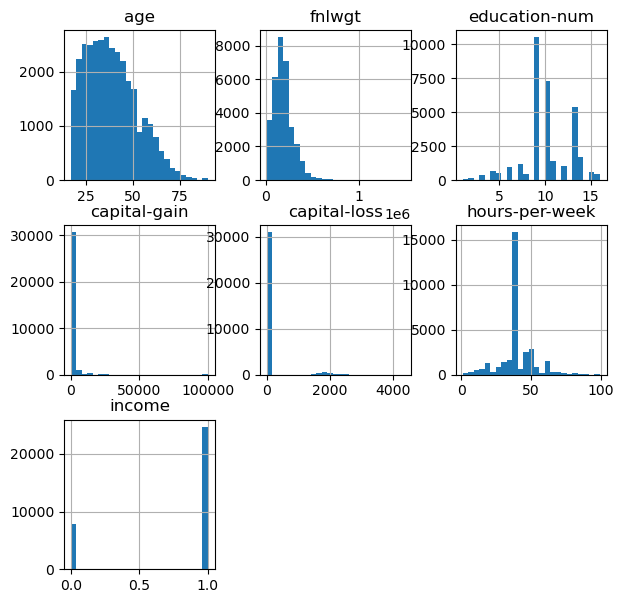

In [3]:
########### Data visualization###############

##########plot histogram########

numerical = [col for col in df.columns if df[col].dtype != 'object' ]
df[numerical].hist(bins=25, figsize=(7, 7))
plt.show()

<Axes: xlabel='age', ylabel='Count'>

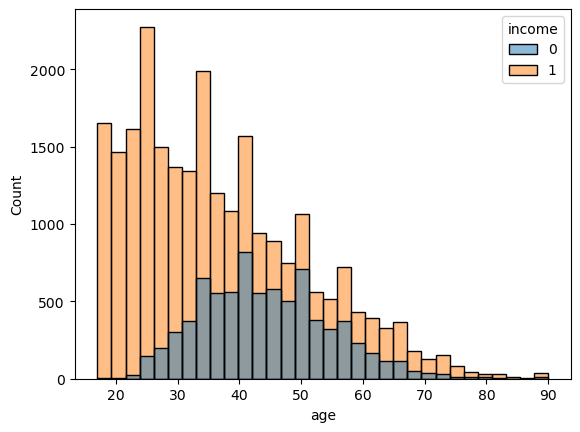

In [4]:
############ Data Analysis########

sns.histplot(df, x='age', hue='income', bins= 32)

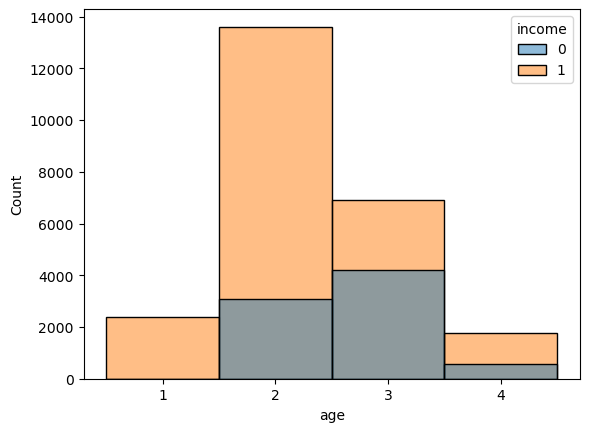

In [5]:
#organize age in classes

def age_group(df):
    age_bins = [0, 20, 40, 60, float('inf')]
    age_labels = ['1', '2', '3', '4']
    df_age_range = df.copy()
    df_age_range['age'] = pd.cut(df_age_range['age'], bins=age_bins, labels=age_labels)
    return df_age_range

df = age_group(df).copy()

sns.histplot(df, x='age', hue='income', bins= 32)

age = pd.get_dummies(df['age'], drop_first=True)
df = df.drop('age',axis=1)

df = pd.concat([df,age],axis=1)



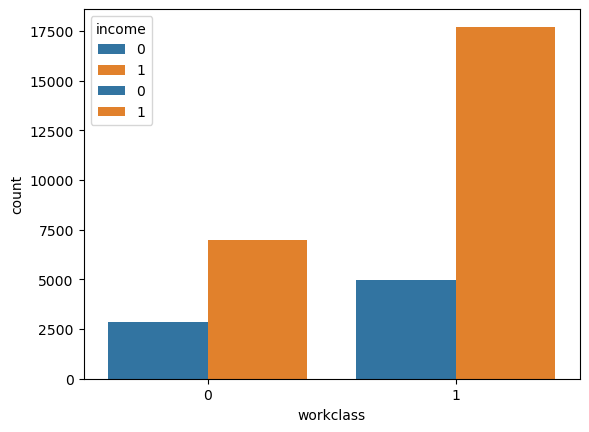

In [6]:
#workclass
sns.countplot(data = df, x = 'workclass', hue = 'income')

df['workclass'] = df['workclass'].apply(lambda x: 1 if x == 'Private' else 0)

sns.countplot(data = df, x = 'workclass', hue = 'income')

#drop fnlwgt
df = df.drop('fnlwgt',axis=1)

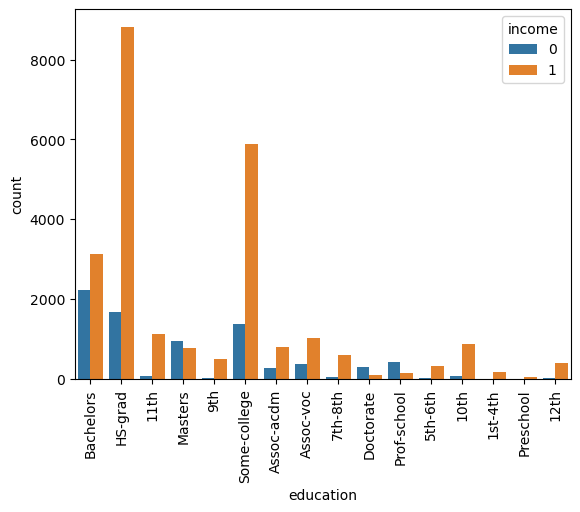

In [7]:
#education

sns.countplot(data = df, x = 'education', hue = 'income')
plt.tick_params(axis='x', rotation=90)

df = pd.get_dummies(df, columns=['education'], drop_first=True)

#drop education-num
df = df.drop('education-num',axis=1)



In [8]:
#Dummy all categorial features
columns_to_dummy = ['marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country']
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True)

#scale numerical features
std = StandardScaler()
mms = MinMaxScaler()
columns_to_scaler = ['capital-gain', 'capital-loss', 'hours-per-week']
df[columns_to_scaler] = std.fit_transform(df[columns_to_scaler]) 

In [9]:
#Split the dataset into training and testing sets

y = df['income']
X = df.drop('income',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [10]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=500)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
]

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy: {np.mean(cv_results):.3f}, Standard deviation: {np.std(cv_results):.3f}")
    


Logistic Regression: Mean Accuracy: 0.853, Standard deviation: 0.005
Support Vector Machine: Mean Accuracy: 0.852, Standard deviation: 0.003
Random Forest: Mean Accuracy: 0.846, Standard deviation: 0.003
Gradient Boosting Classifier: Mean Accuracy: 0.864, Standard deviation: 0.004


In [11]:
best_model_idx = np.argmax([np.mean(result) for result in results])
best_model_name = names[best_model_idx]
print(f"\nThe best model is: {best_model_name}")


The best model is: Gradient Boosting Classifier
